In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datatable as dt
import zipfile
import duckdb
import dask.dataframe as dd
import time

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
dtypes = {
    "a": "int32",
    "b": "category",
    "c": "category",
    "d": "category",
    "e": "int32",
    "f": "int32",
    "g": "int32",
}

In [3]:
t = time.perf_counter()
df = dd.read_csv('data/data.csv', skiprows=8,dtype=dtypes).compute()
#df_train = df_train.compute()
print("load train:", time.perf_counter() - t)


load train: 205.3184609


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300000000 entries, 0 to 1019366
Data columns (total 7 columns):
 #   Column  Dtype   
---  ------  -----   
 0   a       int32   
 1   b       category
 2   c       category
 3   d       category
 4   e       int32   
 5   f       int32   
 6   g       int32   
dtypes: category(3), int32(4)
memory usage: 7.5 GB


In [5]:
df.head(20)

,a,b,c,d,e,f,g
0,0,longue description 0,Victor,Évrat,1779,0,1779
1,1,longue description 1,Ugo,Ogier,3218,0,3218
2,2,longue description 2,Gerard,Zola,3909,0,3909
3,3,longue description 3,Ingrid,Quesada,2672,0,2672
4,4,longue description 4,Xavier,Yvars,4224,0,4224
5,5,longue description 5,Régis,Ferry,3479,0,3479
6,6,longue description 6,Thierry,Zola,0,-402,-402
7,7,longue description 7,Elodie,Hénaut,2623,0,2623
8,8,longue description 0,Xavier,Zola,1249,0,1249
9,9,longue description 1,Pascal,Cannet,1986,0,1986


In [6]:
columns_of_interest = ['e', 'f', 'g']
relevant_data = df[columns_of_interest]

statistics = relevant_data.describe()
print(statistics)

                  e             f             g
count  3.000000e+08  3.000000e+08  3.000000e+08
mean   2.083416e+03 -8.340646e+01  4.437913e+08
std    1.613909e+03  2.206263e+02  2.562233e+08
min    0.000000e+00 -1.000000e+03 -2.470000e+03
25%    5.000000e+02  0.000000e+00  2.218982e+08
50%    2.000000e+03  0.000000e+00  4.437915e+08
75%    3.500000e+03  0.000000e+00  6.656873e+08
max    5.000000e+03  0.000000e+00  8.937760e+08


<AxesSubplot: xlabel='b'>

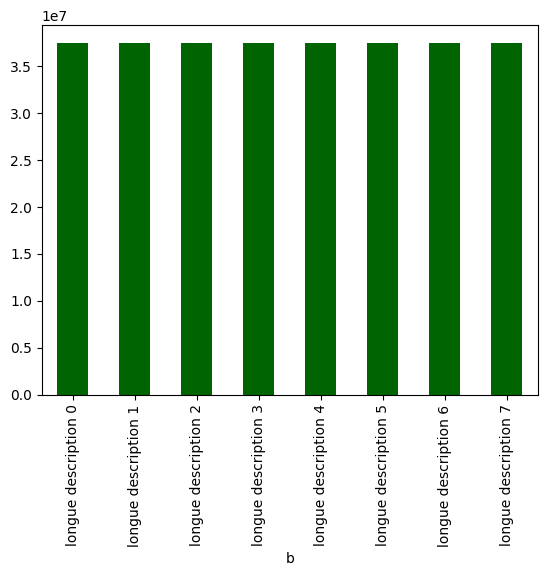

In [7]:
df['b'].value_counts().head(10).plot(kind = 'bar', color = 'darkgreen')

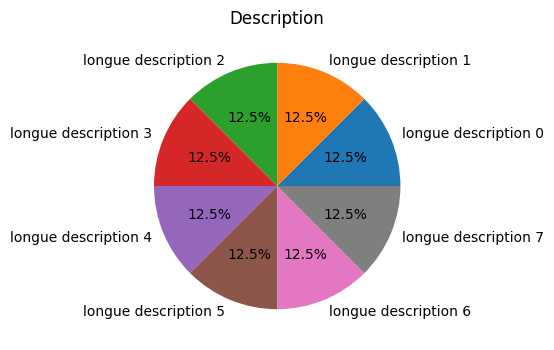

In [8]:
fig= plt.figure(figsize=(11,4))
type_count = df['b'].value_counts()
ax1= plt.subplot(1,2,1)
ax1.pie(type_count.values, labels = type_count.index, autopct='%1.1f%%')
ax1.set_title("Description")

plt.subplots_adjust(wspace=0.7)
plt.show()

<AxesSubplot: >

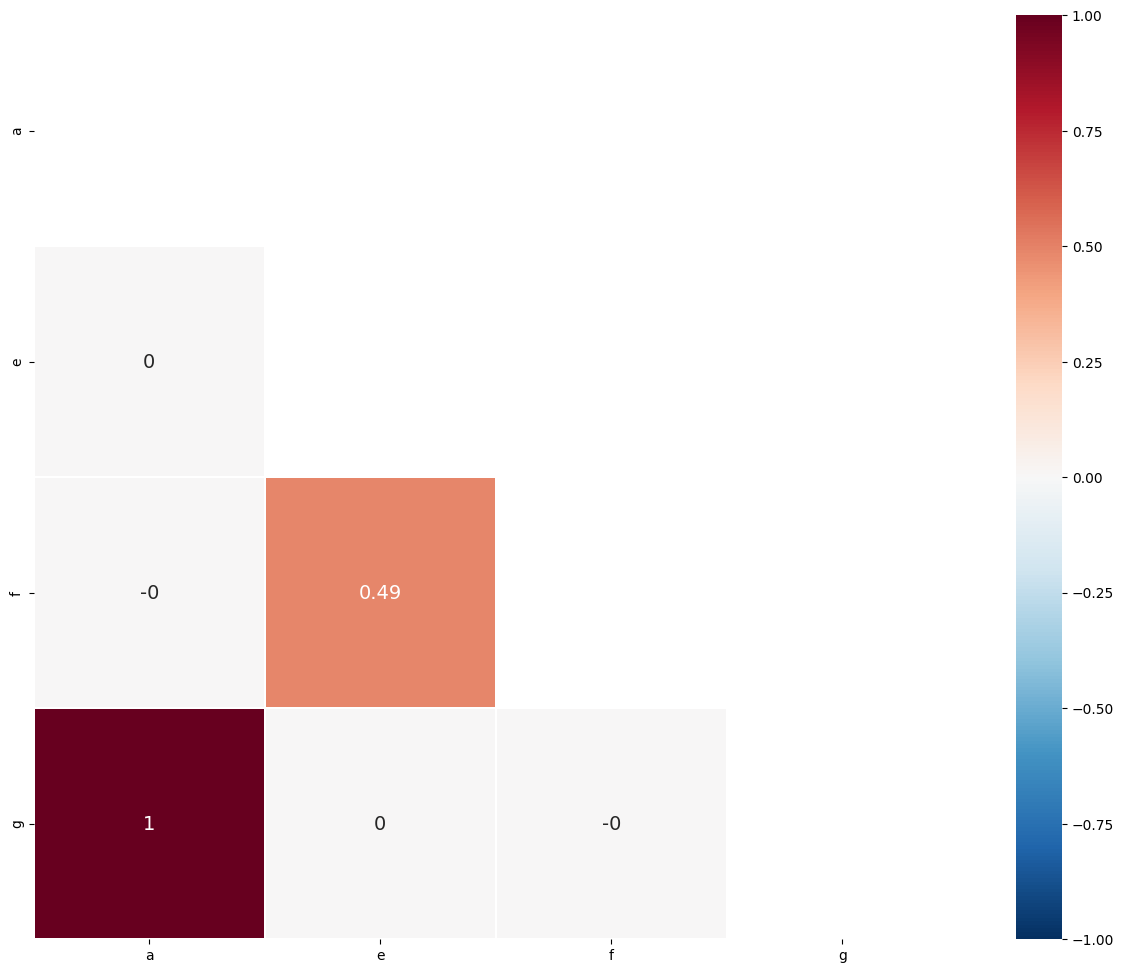

In [9]:
sampled_df = df.sample(frac=0.1)
corr_matrix = sampled_df[df.select_dtypes(include='number').columns].corr().round(3)
colormap = plt.cm.RdBu_r
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize = (15,12))
sns.heatmap(corr_matrix,linewidths=0.1, vmax=1.0, vmin=-1.0, annot = True, 
            linecolor='white',cmap= colormap, square = True, fmt='.2g', annot_kws={"size": 14}, mask = mask)

In [13]:
df[(df['e'] != 0) & (df['f'] !=0) & (df['g']!=0)]

,a,b,c,d,e,f,g


In [14]:
df[(df['e'] > df['g'])]

,a,b,c,d,e,f,g
6,6,longue description 6,Thierry,Zola,0,-402,-402
12,12,longue description 4,Jérémie,Quesada,0,-490,-490
17,17,longue description 1,Pascal,Sablonnière,0,-973,-973
34,34,longue description 2,William,Truchot,0,-159,-159
39,39,longue description 7,Karim,Sablonnière,0,-183,-183
...,...,...,...,...,...,...,...
5716,5716,longue description 4,Karim,Quesada,297,0,-745
6751,6751,longue description 7,Victor,Niels,1181,0,-945
6837,6837,longue description 5,Pascal,Walliand,3817,0,3261
7655,7655,longue description 7,Victor,Niels,2887,0,1942


In [29]:
df[(df['f'] > df['e'])]

,a,b,c,d,e,f,g


In [53]:
# e columns values always greater than f column values 

In [28]:
df[(df['f'] > df['g'])]

,a,b,c,d,e,f,g
238,238,longue description 6,Xavier,Janel,219,0,-156
416,416,longue description 0,Thierry,Sablonnière,505,0,-174
425,425,longue description 1,Elodie,Geneau,776,0,-8
426,426,longue description 2,William,Martin,0,-935,-1396
445,445,longue description 5,Damien,Janel,236,0,-300
...,...,...,...,...,...,...,...
3971,3971,longue description 3,Pascal,Walliand,52,0,-556
4573,4573,longue description 5,Victor,Niels,0,-813,-2126
5695,5695,longue description 7,Karim,Quesada,0,-791,-1042
5716,5716,longue description 4,Karim,Quesada,297,0,-745


In [20]:
df['e'].nunique()

5001

In [21]:
df['f'].nunique()

1001

In [22]:
df['g'].nunique()

254607628

In [26]:
df.duplicated().sum()

0

In [27]:
df.isna().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
dtype: int64

In [47]:
filtered_df2=df[(df['c'] =="Victor") & (df['d']=="Niels")]

In [38]:
df[(df['c'] =="Karim") & (df['d']=="Quesada")].count()

a    444242
b    444242
c    444242
d    444242
e    444242
f    444242
g    444242
dtype: int64

In [40]:
filtered_df = df[(df['c'] =="Karim") & (df['d']=="Quesada")]

In [46]:
filtered_df.head()

,a,b,c,d,e,f,g
4731,4731,longue description 3,Karim,Quesada,0,-251,-251
5695,5695,longue description 7,Karim,Quesada,0,-791,-1042
5716,5716,longue description 4,Karim,Quesada,297,0,-745
7934,7934,longue description 6,Karim,Quesada,2671,0,1926
9185,9185,longue description 1,Karim,Quesada,3071,0,4997


In [49]:
print(f"karim g column: {filtered_df['e'].sum()}")
print(f"Victor g column: {filtered_df2['e'].sum()}")


karim g column: 926798001
Victor g column: 922999535


In [50]:
print(f"karim f column: {filtered_df['f'].sum()}")
print(f"Victor f column: {filtered_df2['f'].sum()}")

karim f column: -37036678
Victor f column: -37003550


In [51]:
print(f"karim g column: {filtered_df['g'].sum()}")
print(f"Victor g column: {filtered_df2['g'].sum()}")

karim g column: 197610601320582
Victor g column: 196432973051044


In [52]:
# based on two simple we can see that g column always has the bigger number where f negative 

In [67]:
grouped_sum_sorted = df.groupby(['c', 'd']).agg({'g': 'sum', 'e': 'sum', 'f': 'sum'}).sort_values(by='g')


In [71]:
grouped_sum_sorted['result'] = grouped_sum_sorted['g'] + grouped_sum_sorted['e'] + grouped_sum_sorted['f']

In [75]:
grouped_sum_sorted.sort_values(by='result')

g          e         f           result
c      d                                                              
Pascal Xharde    195239387233313  919057289 -37197561  195240269093041
Océane Hénaut    195434236559770  920787277 -36859881  195435120487166
Ugo    Geneau    195478544687850  920775767 -37161138  195479428302479
Gerard Quesada   195517304209457  920462772 -37031941  195518187640288
Victor Ivanov    195520425690798  921053927 -37043513  195521309701212
...                          ...        ...       ...              ...
Salomé Urbain    198399223960303  928164291 -37023073  198400115101521
Océane Urbain    198488872427144  928611115 -36700655  198489764337604
       Niels     198639921595881  928388180 -37091200  198640812892861
Céline Barbier   198659273882717  928732181 -37374932  198660165239966
Zoé    Walliand  198899192162975  930697893 -36922000  198900085938868

[676 rows x 4 columns]

In [ ]:
# Zoé	Walliand , Céline	Barbier , Océane Niels are the 3 richest people 
# we can conclude that the a column is the index followed by b column that can be the industry or the source of wealth 
# then the first and second name in both c and d column 
# then we have the g column that has the bigger values that can be the accumulation of money during a specific period 
# then f that has negative values or null it should be the debt 
# last but not least e column that can be the income 